## **Neural Network Regression in TensorFlow**

👁️👁️ Looking to solve Regression Problems

 - Architecture of a neural network regression model
 - Input shapes and output shapes of a regression model (**features** and labels)
 - Creating custom data to view and fit
 - Steps in modelling
  - Creating a model, compiling a model, fitting a model, evaluating a model.
 - Different evaluation methods
 - Saving and loading models

In [1]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


### Creating data to view and fit

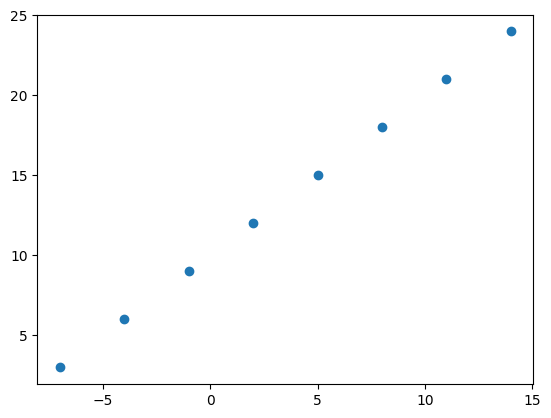

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)


In [3]:
# This is how we get y values from this values (the linear regression of this very simple model)
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [4]:
y == X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

#### Input and Output Shapes

In [5]:
# Create a demo tenosr for our housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

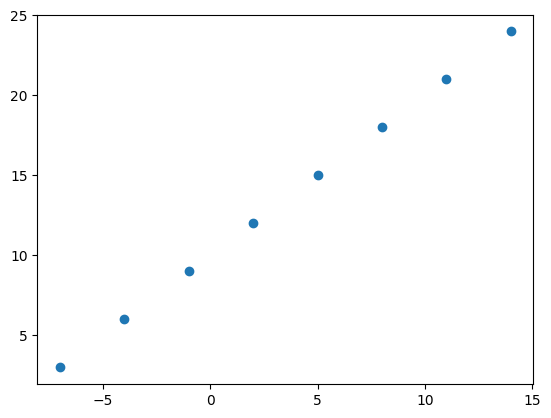

In [10]:
plt.scatter(X, y)


### Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how worng it is), the optimizer (tells our model how to improve the patterns its learning), and the evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features & labels). Epochs - How many times the model will go through all of the training examples
4. **Evaluate the model** on the test data (how reliable are our models predictions?)


In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create amodel using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
]) # into a list method

# add method
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #SGD is short for Stochastic Gradient Descent
              metrics=['mae'])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 6s 6s/step - loss: 10.2360 - mae: 10.2360
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 10.1035 - mae: 10.1035
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 9.9710 - mae: 9.9710
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 9.8385 - mae: 9.8385
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 9.7060 - mae: 9.7060


In [12]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 80ms/step


array([[18.878616]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization fucntion or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit the model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [14]:
# Rebuilding our model

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 336ms/step - loss: 11.7601 - mae: 11.7601
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.6276 - mae: 11.6276
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.4951 - mae: 11.4951
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.3626 - mae: 11.3626
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2301 - mae: 11.2301
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0976 - mae: 11.0976
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9651 - mae: 10.9651
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8326 - mae: 10.8326
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 10.7001 - mae: 10.7001
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5676 - mae: 10.5676
Epoch 11/100
1/1 [==============================] - 0

In [15]:
# Remind the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Let's see if the model prediction has improved
model.predict([17.])

1/1 [==============================] - 0s 54ms/step


array([[30.11359]], dtype=float32)

In [17]:
# Rebuilding (third time) our model
# Adding a hidden layer

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 874ms/step - loss: 13.6007 - mae: 13.6007
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.2011 - mae: 13.2011
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8561 - mae: 12.8561
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 12.4727 - mae: 12.4727
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0599 - mae: 12.0599
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 11.5916 - mae: 11.5916
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0387 - mae: 11.0387
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.3737 - mae: 10.3737
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 9.5400 - mae: 9.5400
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 8.4763 - mae: 8.4763
Epoch 11/100
1/1 [==============================] - 

In [18]:
model.predict([17.])

1/1 [==============================] - 0s 66ms/step


array([[34.327934]], dtype=float32)

In [19]:
# Rebuilding our model

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.9239 - mae: 13.9239
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2777 - mae: 13.2777
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.6308 - mae: 12.6308
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9802 - mae: 11.9802
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.3234 - mae: 11.3234
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6581 - mae: 10.6581
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.9826 - mae: 9.9826
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 9.2950 - mae: 9.2950
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.5928 - mae: 8.5928
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.8735 - mae: 7.8735
Epoch 11/100
1/1 [==============================] - 0s 9ms/

In [20]:
model.predict([25.])

1/1 [==============================] - 0s 86ms/step


array([[35.214943]], dtype=float32)

#### RECAP: Common ways to improve a deep model
- Adding layers
- Increase the number of hideen units
- Change the activation functions
- Change the optimization function
- Change the learning rate (👁️ The most useful hyperparameter to improve our neural network)
- Sampling more data (bigger datasets)
- Fitting training for longer (epochs)

### Evaluating a model

In practice a typical workflow you'll go through when building neural networks is:

```
Build model -> fit it -> evaluate it -> tweak model -> fit it -> evaluate it -> tweak model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it looks like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground thruth (the original labels)?


In [21]:
# Make a bigger data set
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# Make labels for the data set
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

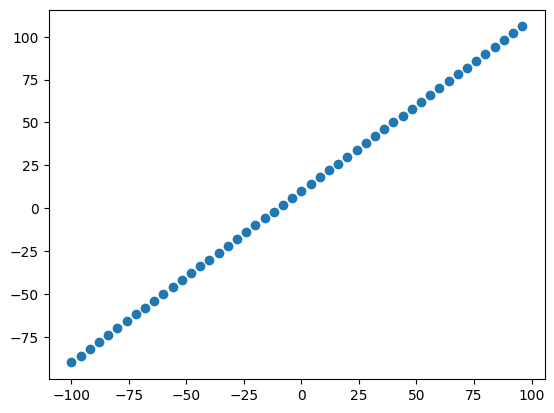

In [23]:
# Visualize the data
plt.scatter(X,y)

#### The three sets...

* Training set - the models learns from this data, which is typlically 70-80% of the data available.
* Validation set - the model gets tuned on this data, which is typpically 10-15% of the data.
* Test set - the model gets evaluated on this data to test what is has learned, this set is typlically 10-15% of the total of the data.

Generalization - The ability for a machine learning model to perform well on data it hasn't seen before.

In [24]:
# Check the length of the samples we have
len(X)

50

In [25]:
# Split into training and test (this data is too small for validation)
X_train = X[:40] # The first 40 are trainig samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # the last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

#### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again

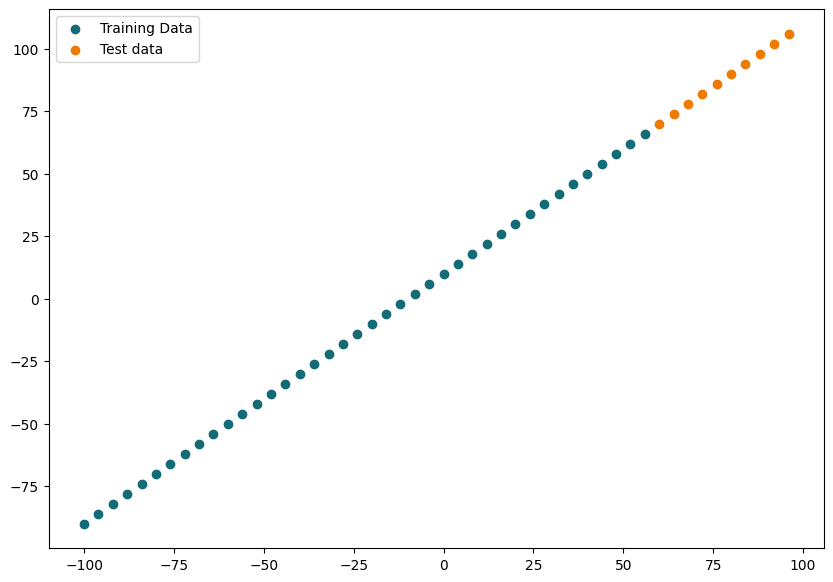

In [26]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='#126b75', label='Training Data')
# Plot test data in green
plt.scatter(X_test, y_test, c='#EE7A01', label='Test data')
# Show a legend
plt.legend()

In [27]:
# Let´s have a look up at how to build a neural network for our data

# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# # 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

#### Visualizing the model

In [28]:
# Let's create a model which builds automatically by defining the imput_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name="model_1")

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the patterns the model can update as it trains
* Non-trainable - these parameters aren't updated during training (this is typical when you brought parameters from other models during **transfer learning**)

👁️ **Resource:** Fore a more in-depth overview check:

https://www.youtube.com/watch?v=QDX-1M5Nj7s&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=2

MIT - Introduction to Deep Learning
http://introtodeeplearning.com/

⚒️ **Exercise** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [30]:
# Let`s fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

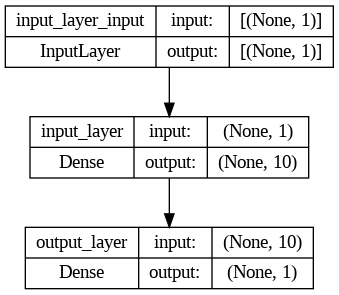

In [31]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

#### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model`s predictions).

In [32]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 53ms/step


array([[ 76.3598  ],
       [ 81.335205],
       [ 86.31061 ],
       [ 91.28601 ],
       [ 96.26141 ],
       [101.2368  ],
       [106.21222 ],
       [111.18761 ],
       [116.16301 ],
       [121.13841 ]], dtype=float32)

In [33]:
# Remember X_test values
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

👁️ **Note:** If you feel like you`re going to reuse some kind of functionality in the future is a good idea to turn it into a function

In [34]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in one color
  plt.scatter(train_data, train_labels, c='#126b75', label='Training Data')
  # Plot test data in another color
  plt.scatter(test_data, test_labels, c='#EE7A01', label='Test data')
  # Plot model's predictions in the other color
  plt.scatter(test_data, predictions, c='#94192a', label='Predictions')
  # Show a legend
  plt.legend();




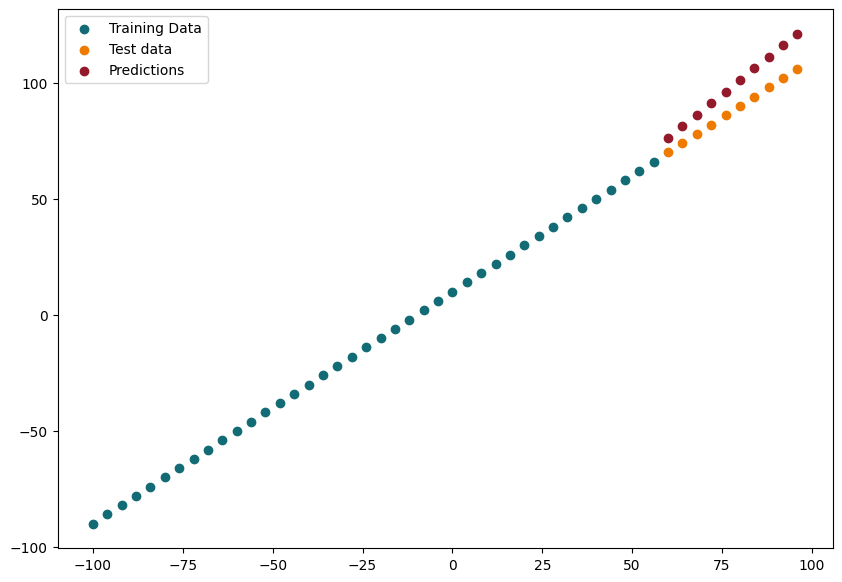

In [35]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

#### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you are working on, there will be different evalutaion metrics to evaluate your model's performance.

Working in a Regression, two of the main metrics are:
* MAE - mean absolute error, "on average, how worng is each of my model's predictions".
* MSE - mean square error, "square the average errors"

In [36]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 125ms/step - loss: 10.7491 - mae: 10.7491


[10.749109268188477, 10.749109268188477]

In [37]:
tf.constant(tf.squeeze(y_pred))


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.3598  ,  81.335205,  86.31061 ,  91.28601 ,  96.26141 ,
       101.2368  , 106.21222 , 111.18761 , 116.16301 , 121.13841 ],
      dtype=float32)>

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [39]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(tf.squeeze(y_pred)))
mae


<tf.Tensor: shape=(), dtype=float32, numpy=10.749109>

👁️ If we are trying to compare Tensors we need to make shapes and dtypes equal to each other:

That's why we use:
`y_pred=tf.constant(tf.squeeze(y_pred))`

In [40]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                   y_pred=tf.constant(tf.squeeze(y_pred)))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=123.392456>

In [41]:
# Make functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

In [42]:
mse(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=123.392456>

### Runnning experiments to improve our model experiments


```
Build model -> fit it -> evaluate it -> tweak model -> fit it -> evaluate it -> tweak model -> fit it -> evaluate it...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer -  give your model more of a chance to find patterns in the data

Let's do three model experiments:

1. `model_1` - same as the original model, 1 layer, trained por 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.
4.
5.

**Build** `model_1`


In [43]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 44.6417 - mae: 44.6417
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 14.3927 - mae: 14.3927
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 13.3507 - mae: 13.3507
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 7.5537 - mae: 7.5537
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 7.5646 - mae: 7.5646
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0587 - mae: 9.0587
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4707 - mae: 9.4707
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3305 - mae: 9.3305
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 7.5192 - mae: 7.5192
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 12.5939 - mae: 12.5939
Epoch 11/100
2/2 [==============================] - 0s 10ms/step - los

1/1 [==============================] - 0s 41ms/step


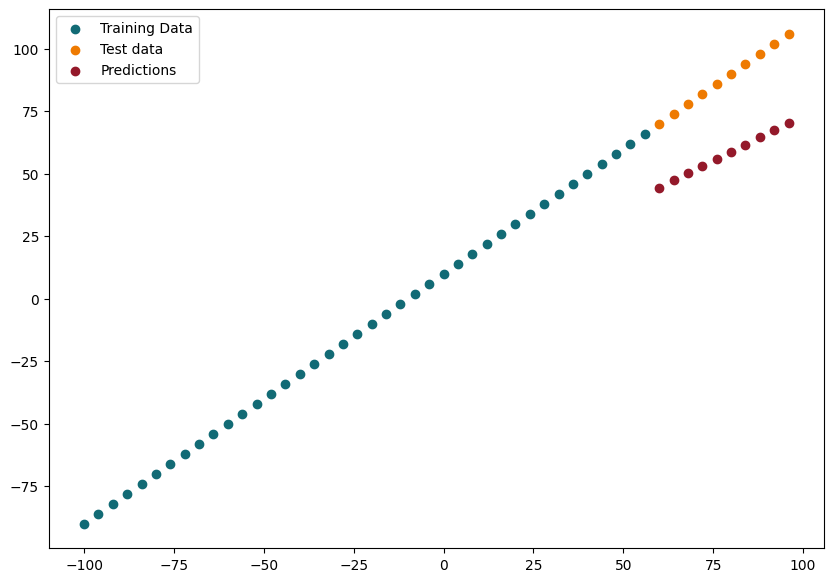

In [44]:
# Make and plot predictions to model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [45]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.618515>,
 <tf.Tensor: shape=(), dtype=float32, numpy=947.90546>)

**Build** `model_2`

In [46]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics='mse')

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 70.3029 - mse: 7868.2603
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 40.7119 - mse: 2642.7227
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 28.1048 - mse: 1157.3356
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 14.1603 - mse: 266.0883
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 19.3815 - mse: 512.1329
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.6680 - mse: 121.7314
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 10.6363 - mse: 142.1386
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9619 - mse: 138.1765
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 38.3726 - mse: 2280.9666
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 25.9009 - mse: 942.8997
Epoch 11/100
2/2 [===========================

1/1 [==============================] - 0s 47ms/step


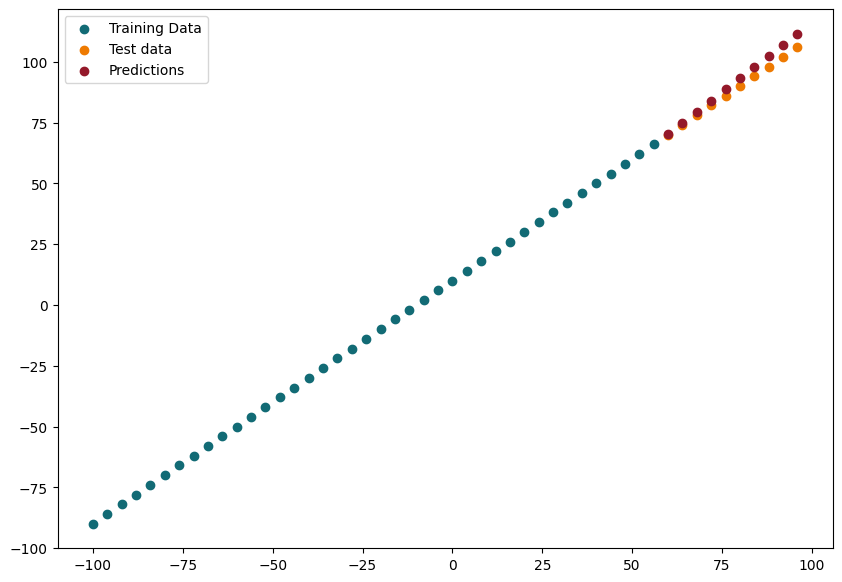

In [47]:
# Make predictions and plotting into a scatter plot using previous function
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [48]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.9019387>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.141665>)

**Build** `model_3`

In [49]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3  = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics='mse')

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 41.4656 - mse: 2391.3508
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 31.9683 - mse: 1435.8389
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 22.9862 - mse: 744.3212
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 13.9739 - mse: 275.6450
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 6.2259 - mse: 58.3967
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 6.4722 - mse: 51.3531
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.7084 - mse: 88.2931
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 7.2136 - mse: 69.4328
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 5.2629 - mse: 41.9876
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 5.5185 - mse: 42.8208
Epoch 11/100
2/2 [==============================] - 0s 8m

1/1 [==============================] - 0s 70ms/step


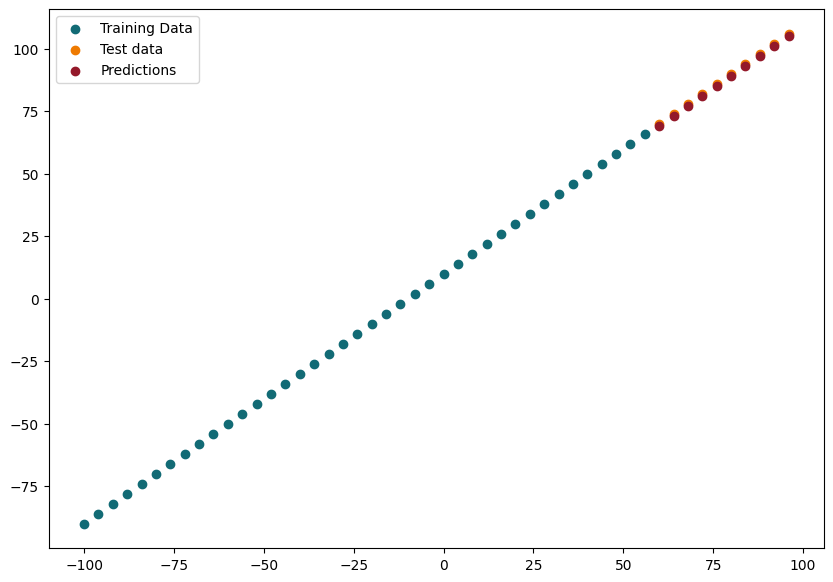

In [50]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [51]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.9009911>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.8121333>)

👁️ **NOTE:** You want to start with small experiments (small models) and make sure they work and then improve the model that works better

### Comparing the results of our experiments

We've run a few experiments, let´s comapre the results

In [52]:
# Let´s compare our model's result using a pandas DataFrame
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model','mae','mse'])
all_results

,model,mae,mse
0,model_1,30.618515,947.905457
1,model_2,2.901939,11.141665
2,model_3,0.900991,0.812133


In [53]:
model_2.summary(), model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               200       
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 

(None, None)

👁️ **NOTE:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don´t work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment"

### Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And doing so, it can be tedius if you're running lots of experiments.

Luckily, there are tools to help us!

💊 **Resource** As you builkd more models you look into using:
* [TensorBoard](https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modelling experiments
* [Weight and Biases](https://wandb.ai/site) - a tool for tracking all kinds of machine learning experiments (plugs straight to TensorBoard)

### Saving our models

Saving our models allows us to use them outside of Google Colab (or whereever they were trained) such in a web application or a mobile app.

There are tow main formats

1. The SavedModel format
2. The HDF5 format

In [54]:
# Save using SavedModel
model_3.save('best_model_SavedModel_format')

In [55]:
 # Save using HDF5
 model_3.save('best_model_HDF5_format.h5')

### Loading and using saved models

In [56]:
# Loading a SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('/content/best_model_SavedModel_format')

1/1 [==============================] - 0s 84ms/step


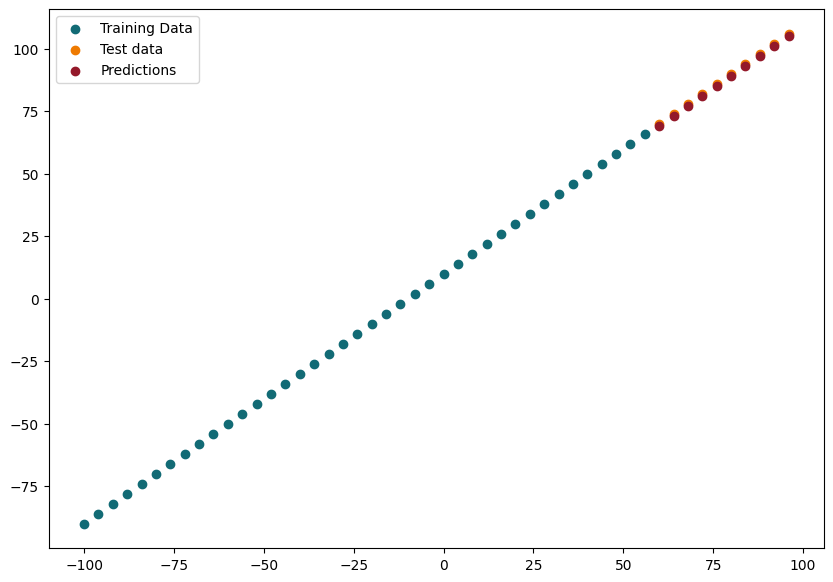

In [57]:
y_preds_4 = loaded_SavedModel_format.predict(X_test)
plot_predictions(predictions=y_preds_4)

In [58]:
y_preds_4

array([[ 69.12788 ],
       [ 73.12158 ],
       [ 77.11529 ],
       [ 81.10898 ],
       [ 85.10265 ],
       [ 89.09601 ],
       [ 93.089386],
       [ 97.08275 ],
       [101.07611 ],
       [105.06946 ]], dtype=float32)

In [59]:
loaded_SavedModel_format.summary()
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               200       
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               200       
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params

In [60]:
y_preds_3 == y_preds_4

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [61]:
# Loading a model using the HDF5 model
loaded_h5_model = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')

1/1 [==============================] - 0s 95ms/step


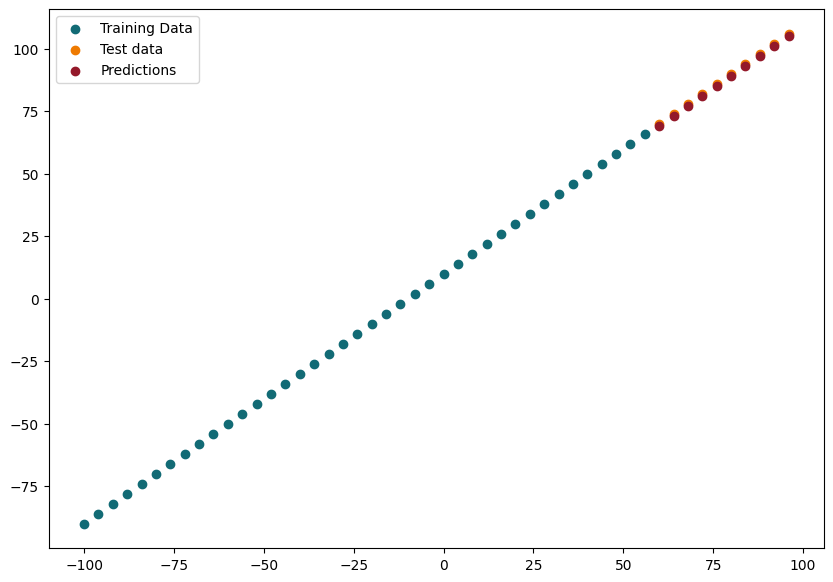

In [62]:
y_preds_5 = loaded_h5_model.predict(X_test)
plot_predictions(predictions=y_preds_5)

In [63]:
y_preds_3 == y_preds_5

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])